## Finding the Best Classification Model for Intel Image Dataset

In [64]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.utils import shuffle
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical   

import cv2
import csv
import os

import warnings
warnings.filterwarnings('ignore')

seed = 1234
np.random.seed(seed) 

### Import Data Images

In [65]:
## Image clean source: https://www.kaggle.com/code/uzairrj/beg-tut-intel-image-classification-93-76-accur

def get_images(path):
    IntelData, Labels = [], []
    
    for labels in os.listdir(path):
        for image_file in os.listdir(path+labels):
            image = cv2.imread(path+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150))
            IntelData.append(image)
            Labels.append(Word_to_Label([labels][0]))
    return shuffle(IntelData,Labels,random_state=seed)
    
def Label_to_Word(label):
    label_dict = {0:"buildings", 1:"forest", 2:"glacier", 3:"mountain", 4:"sea", 5:"street"}
    return label_dict[label]

def Word_to_Label(word):
    word_dict = {"buildings": 0, "forest":1, "glacier":2, "mountain":3, "sea":4, "street":5}
    return word_dict[word]

In [62]:
## read training images

X_tr, y_tr = get_images('./Data/seg_train/')
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)

X_val, y_val = get_images('./Data/seg_test/')
X_val = np.array(X_val)
y_val = np.array(y_val)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(14034, 150, 150, 3) (14034,)
(3000, 150, 150, 3) (3000,)


### Take a Glimpse at the Data

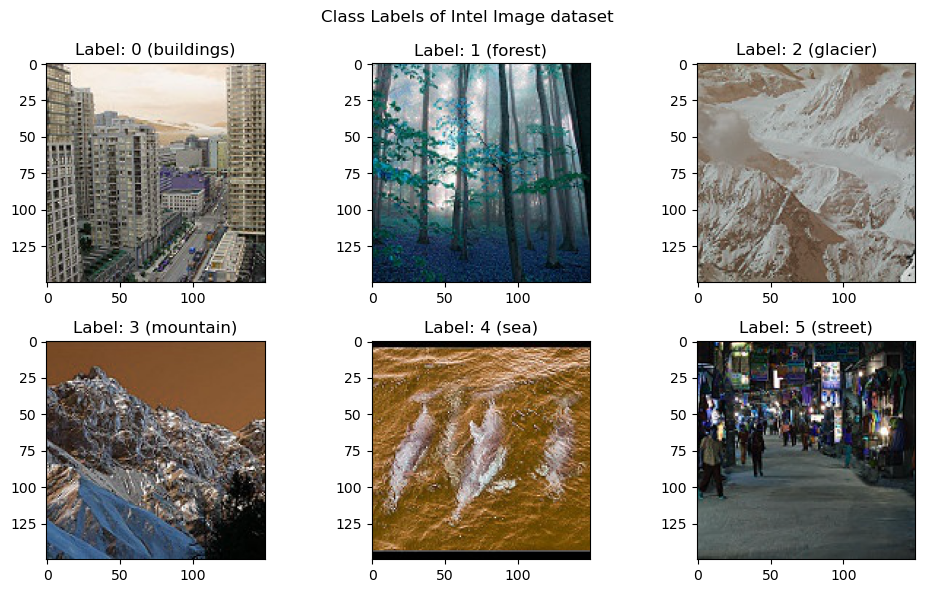

In [73]:
def find(arr, elem):
    for index, item in enumerate(arr):
        if item == elem:
            return index

figure, axes = plt.subplots(2, 3, figsize=(10, 6)) 

TrueLabels = {0:"buildings", 1:"forest", 2:"glacier", 3:"mountain", 4:"sea", 5:"street"}

i = 0
for x in range(2): 
    for y in range(3):
        index = find(y_tr, i)
        axes[x, y].imshow(X_tr[index]) 
        axes[x, y].set_title(f'Label: {i} ({TrueLabels[i]})') 
        i+= 1

plt.suptitle("Class Labels of Intel Image dataset")
plt.tight_layout() 


### Clean and Standardize Data

In [74]:
X_tr = np.reshape(X_tr, (14034,67500))
X_val = np.reshape(X_val, (3000,67500))

y_tr = y_tr.flatten()
y_val = y_val.flatten()

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

### Make Confusion Matrix

In [75]:
def cm(y_pred, title):
    fig, ax = plt.subplots(figsize=(7, 5))

    sklearn_cm_eu = confusion_matrix(y_te, y_pred)
    sns.heatmap(sklearn_cm_eu, annot=True, ax=ax, fmt='g')

    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    ax.set_title(f"Confusion Matrix of Fashion-MNIST using {title}")
    return plt

### Record Results

In [76]:
def write_results(file, settings, headers):   
    with open(file, "a", newline='\n') as f:
        writer = csv.DictWriter(f, fieldnames=headers)
        writer.writerow(settings)

def view_results(file):
    df = pd.read_csv(file)
    return df

### Show Incorrect Predictions

In [77]:
def find_incorrect(predictions, true_label, predict_label):
    
    results = []
    length = len(y_te)
    for i in range(length):
        if y_te[i] == true_label and predictions[i] == predict_label:
            results.append(i)
        if len(results) == 10:
            return results

def print_incorrect(predictions, true_label, predict_label):
    
    indices = find_incorrect(predictions, true_label, predict_label)
    
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray' 
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    
    for i in range(10):
        axes[i//5, i%5].imshow(X_te[indices[i]].reshape(28, 28))
        
    fig.suptitle(f"Images of {TrueLabels[true_label]} But Predicted As {TrueLabels[predict_label]}")
    plt.tight_layout()
    return plt